In [1]:
sys.version

NameError: ignored

In [2]:
import sys
sys.version

'3.7.12 (default, Jan 15 2022, 18:48:18) \n[GCC 7.5.0]'

In [3]:
# Install fastai
!pip3 install fastai

AttributeError: ignored

In [4]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.4 MB/s 
     |████████████████████████████████| 1.2 MB 39.3 MB/s 
     |████████████████████████████████| 189 kB 48.3 MB/s 
     |████████████████████████████████| 48 kB 4.7 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 51 kB 301 kB/s 
     |████████████████████████████████| 558 kB 44.7 MB/s 
     |████████████████████████████████| 130 kB 42.6 MB/s 
Mounted at /content/gdrive


In [37]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.156781,0.025773,0.010149,01:43


epoch,train_loss,valid_loss,error_rate,time
0,0.065622,0.041408,0.006766,02:20


In [10]:
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])


img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Chat ?: {is_cat}.")
print(f"A peu près: {probs[1].item():.6f} que ce soit un chat")



FileNotFoundError: ignored

In [11]:
from fastai.vision.widgets import *

In [38]:
uploader = widgets.FileUpload()
uploader


FileUpload(value={}, description='Upload')

In [39]:


img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")



Is this a cat?: True.
Probability it's a cat: 1.000000


In [18]:
??verify_images

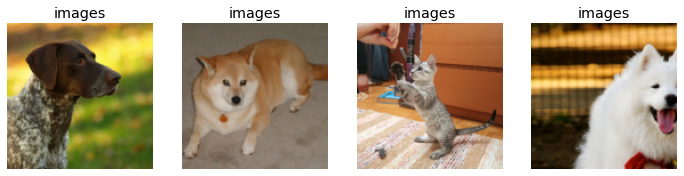

In [21]:


bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))



dls = bears.dataloaders(path)

dls.valid.show_batch(max_n=4, nrows=1)

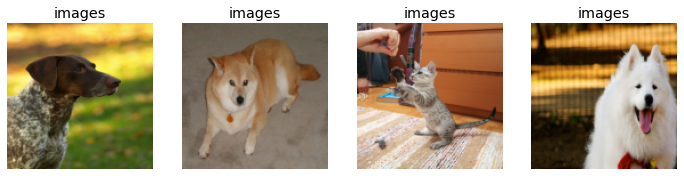

In [22]:


bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)



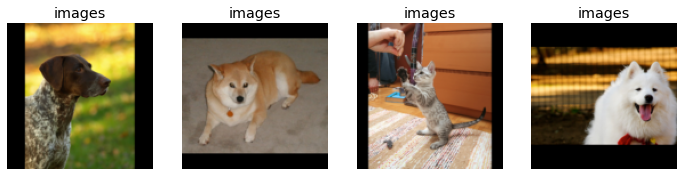

In [24]:


bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [26]:
#hide
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [27]:


dest = 'images/grizzly.jpg'
download_url(ims[0], dest)



NameError: ignored

In [28]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


In [29]:


learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)



Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,01:09


epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,01:26
1,0.000000,0.000000,0.000000,01:25
2,0.000000,0.000000,0.000000,01:25
3,0.000000,0.000000,0.000000,01:24


In [30]:
!pwd


/content
